<a href="https://colab.research.google.com/github/Reza-aghajari/ML2023/blob/main/MP2_Q1_Aghajari_9819583.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1xpgULX2uzHz672xmyUu4clfrCSL3htcW

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1xpgULX2uzHz672xmyUu4clfrCSL3htcW
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 6.42MB/s]


In [3]:
import pandas as pd
data = pd.read_csv("/content/Perceptron.csv")
data

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0
...,...,...,...
395,0.574634,0.782211,-1.0
396,-1.413307,-0.673049,1.0
397,-0.465114,-1.290830,1.0
398,1.522055,0.948007,-1.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
# Changing values to {0, 1}
y = np.where(y == -1, 0, 1)


In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=83)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [44]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
y_train=y_train.reshape(-1,1)
x_train.shape,y_train.shape

((320, 2), (320, 1))

In [45]:
def mse(y,y_hat):
  return np.mean((y-y_hat)**2)

def bce(y,y_hat):
  return np.mean(-(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))

def sigmoid(x):
  return 1/(1+np.exp(-x))

In [46]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [58]:
b = np.random.randn()

In [53]:
neuron = Neuron(in_features=2, af=sigmoid, loss_fn=bce, n_iter=100, eta=0.1, verbose=True)
neuron.fit(x_train, y_train)

Iter=0, Loss=0.4432
Iter=10, Loss=0.2905
Iter=20, Loss=0.2119
Iter=30, Loss=0.1658
Iter=40, Loss=0.136
Iter=50, Loss=0.1154
Iter=60, Loss=0.1002
Iter=70, Loss=0.08873
Iter=80, Loss=0.07968
Iter=90, Loss=0.07238


In [54]:
neuron.parameters()

{'w': array([[-2.87259935],
        [-0.3247409 ]]),
 'b': -0.2177492066466948}

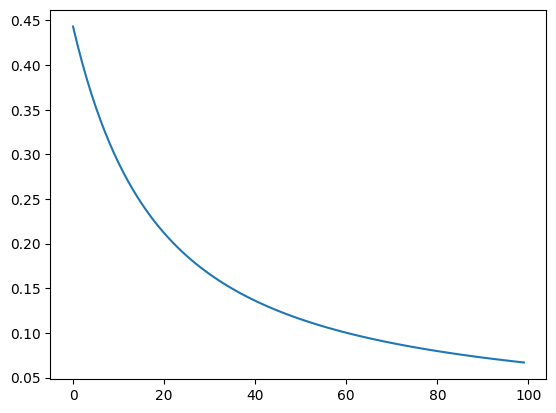

In [55]:
plt.plot(neuron.loss_hist)

In [56]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

<Axes: >

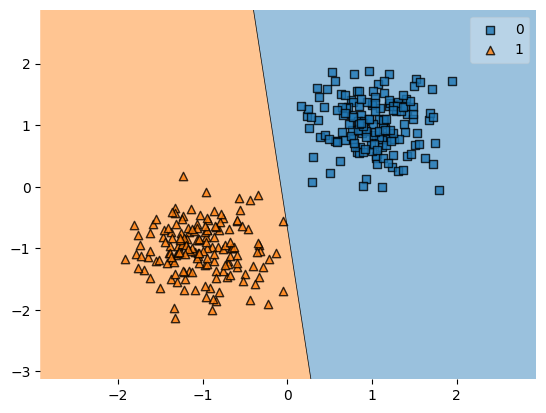

In [57]:
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

x = data.iloc[:,0:-1]
y = data.iloc[:,-1]
y = np.where(y == -1, 0, 1)

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=83)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_train=np.asarray(x_train)

plot_decision_regions(x_train, y_train, clf=neuron)